In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data and compute accuracy degradation
baseline_acc = 0.902999997138977
data = pd.read_csv('out/char.tsv', sep='\t', names=['seed', 'i', 'j', 'c', 'loss', 'accuracy'])
data = data[data['i'] != 8]
data = data[data['j'] != 8]
data.loc[data['i'] > 7, 'i'] -= 1
data.loc[data['j'] > 7, 'j'] -= 1
data['accdeg'] = baseline_acc - data['accuracy']

data.head()

,seed,i,j,c,loss,accuracy,accdeg
0,0,0,1,0.001000,0.395900,0.9028,0.0002
1,0,0,1,0.001540,0.395798,0.9030,0.0000
2,0,0,1,0.002371,0.395761,0.9030,0.0000
3,0,0,1,0.003652,0.395709,0.9027,0.0003
4,0,0,1,0.005623,0.396143,0.9029,0.0001


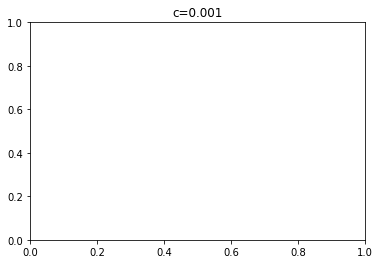

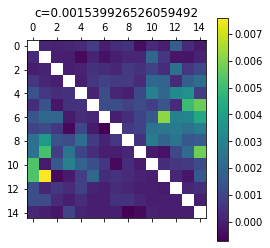

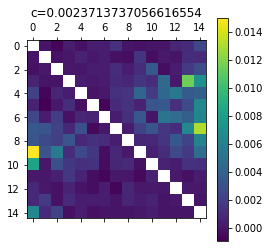

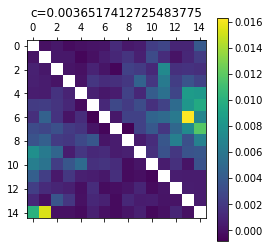

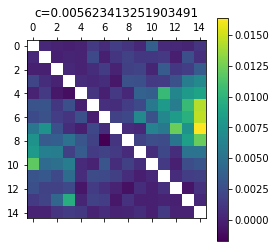

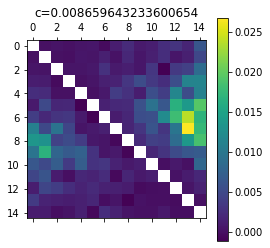

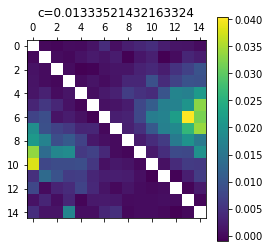

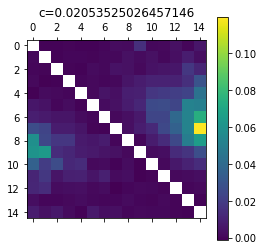

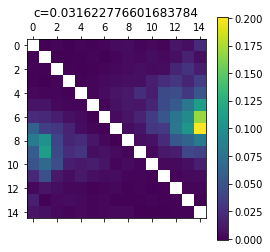

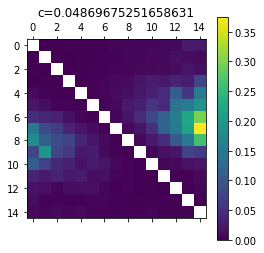

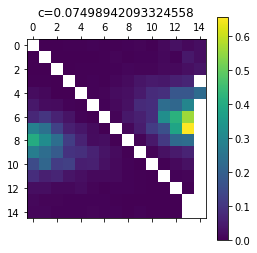

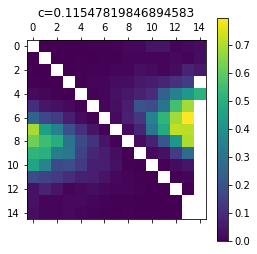

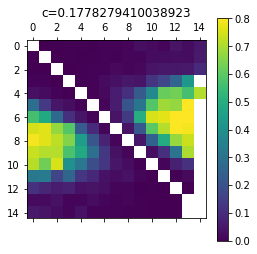

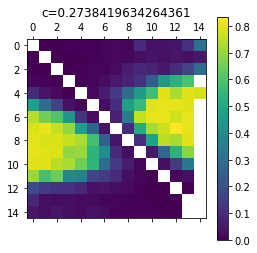

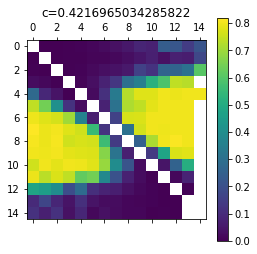

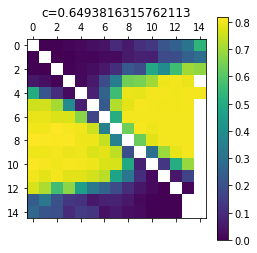

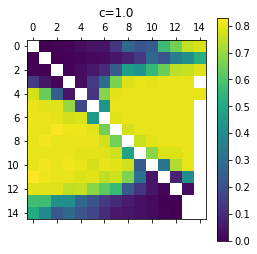

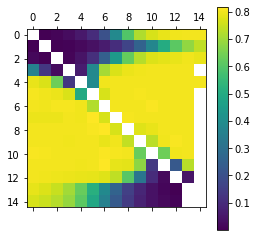

In [4]:
# Get and plot accuracy degradation matrix for different c values
for c, ds in data.groupby('c'):
    accdegmat = np.zeros((15,15))
    accdegmat[:] = np.NaN
    for d in ds.iterrows():
        accdegmat[int(d[1].i)][int(d[1].j)] = d[1].accdeg
    plt.title(f'c={c}')
    mat = plt.matshow(accdegmat)
    plt.colorbar(mat)

In [5]:
# Get weight frequencies
weightfreq = pd.read_csv('out/weightfreq.tsv', sep='\t', names=['layer', 'weight', 'freq'])
weightfreq['val'] = weightfreq['weight'] - 7
weightfreq.loc[weightfreq['val'] > 0, 'val'] -= 1

# Merge weight frequencies back into data
weightfreq['nweight'] = weightfreq['weight']
weightfreq.loc[weightfreq['nweight'] > 7, 'nweight'] -= 1
wf = weightfreq.groupby('nweight').sum()['freq'].reset_index()
data = data.merge(wf, left_on='i', right_on='nweight')
data

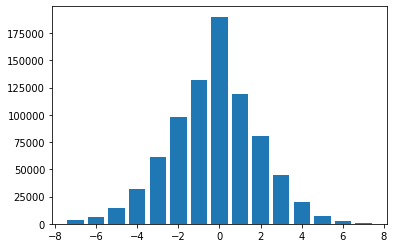

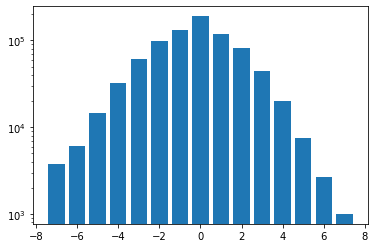

In [6]:
# Plot weight frequencies on linear and log scale
f = weightfreq.groupby('val').sum()['freq']
plt.bar(f.index, f)
plt.show()
plt.bar(f.index, f)
plt.yscale('log')

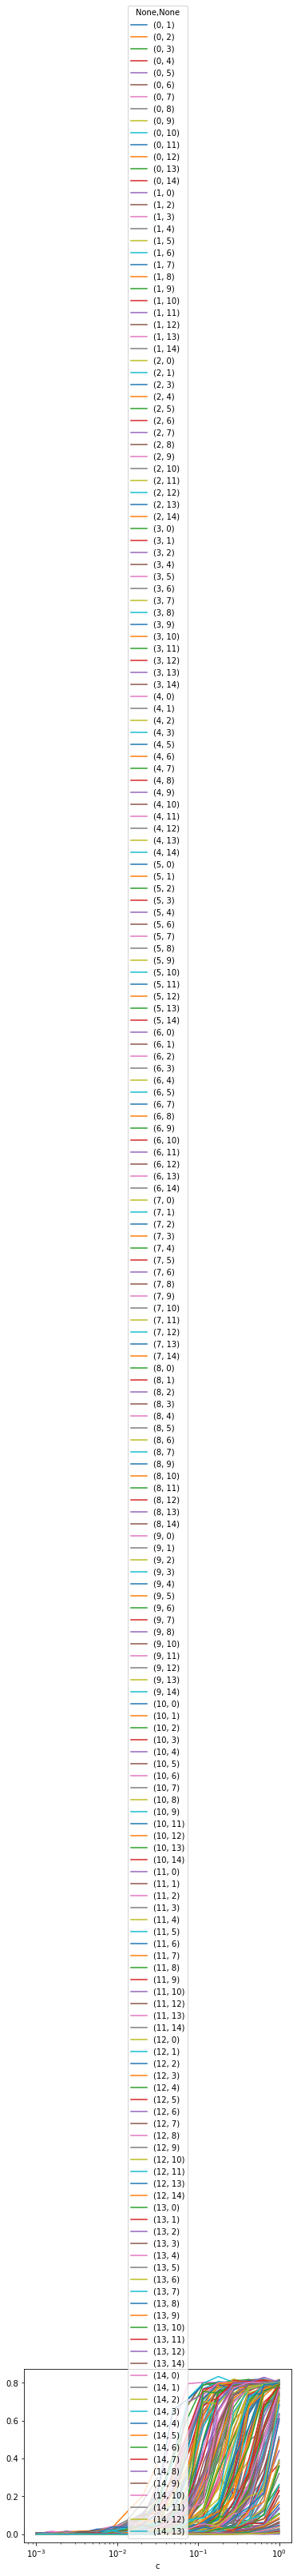

In [7]:
# Accuracy degradation vs. perturbation
for i, d in data[data['seed'] == 0].groupby(['i','j']):
    if i[0] != i[1]:
        plt.figure(i[0])
        d.plot('c', 'accdeg', logx=True, label=i, ax=plt.gca())

In [8]:
# Accuracy degradation vs. perturbation (normalized by frequency)
weightfreq['nweight'] = weightfreq['weight']
weightfreq.loc[weightfreq['nweight'] > 7, 'nweight'] -= 1
wf = weightfreq.groupby('nweight').sum()['freq'].reset_index()
data = data.merge(wf, left_on='i', right_on='nweight')
data

,seed,i,j,c,loss,accuracy,accdeg,nweight,freq
0,0,0,1,0.001000,0.395900,0.9028,0.0002,0,3765
1,0,0,1,0.001540,0.395798,0.9030,0.0000,0,3765
2,0,0,1,0.002371,0.395761,0.9030,0.0000,0,3765
3,0,0,1,0.003652,0.395709,0.9027,0.0003,0,3765
4,0,0,1,0.005623,0.396143,0.9029,0.0001,0,3765
...,...,...,...,...,...,...,...,...,...
3517,0,8,14,0.005623,0.474956,0.8843,0.0187,8,118728
3518,0,8,14,0.008660,0.482456,0.8873,0.0157,8,118728
3519,0,8,14,0.013335,0.849790,0.8377,0.0653,8,118728
3520,0,8,14,0.020535,0.940091,0.8200,0.0830,8,118728


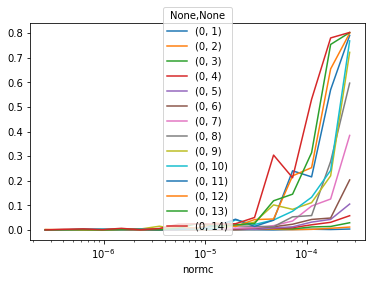

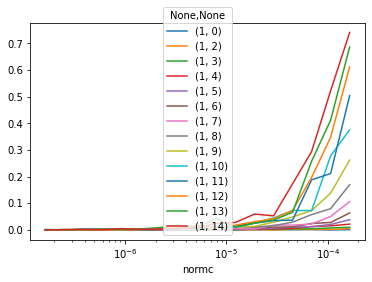

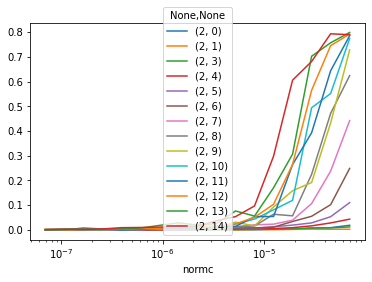

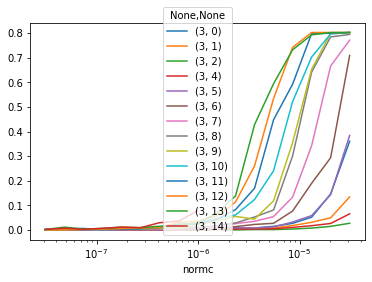

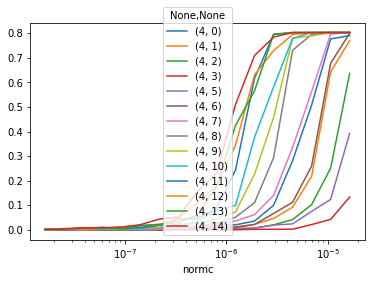

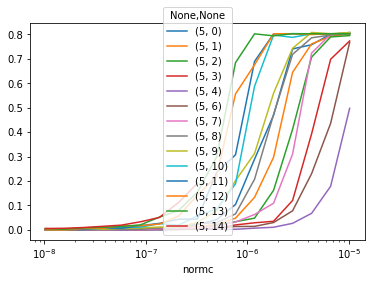

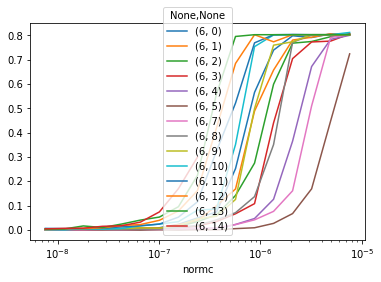

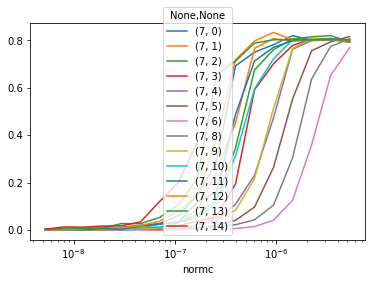

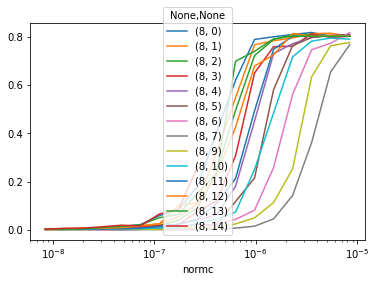

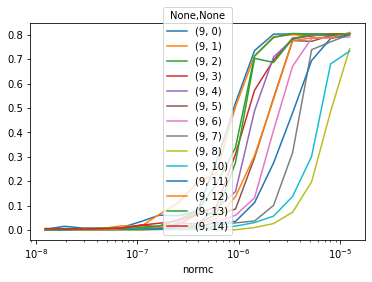

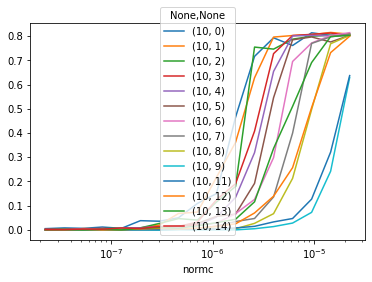

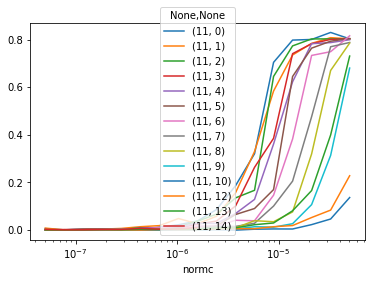

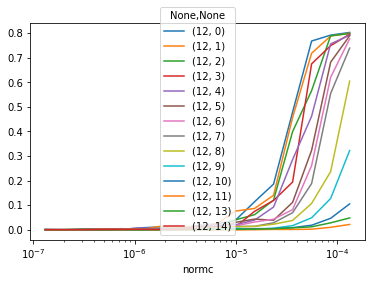

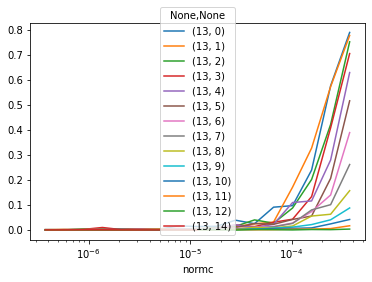

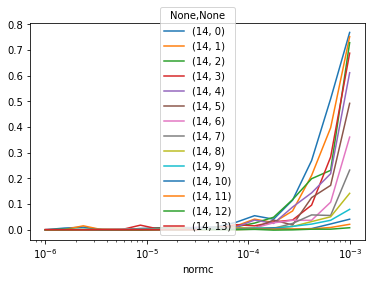

In [17]:
# Accuracy degradation vs. perturbation
data['normc'] = data['c'] / data['freq']
for i, d in data[data['seed'] == 0].groupby(['i','j']):
    if i[0] != i[1]:
        plt.figure(i[0])
        d.plot('normc', 'accdeg', logx=True, label=i, ax=plt.gca())